<a href="https://colab.research.google.com/github/junauh/travel-cost/blob/master/Cost_of_Travel_CPH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Planes vs. the rest: What's the real cost of travel?

## Background
According to Booking.com, over 50 percent of global travellers are planning to take more weekend trips in 2019. Lasting for an average of three days, travelers are squeezing curated travel itineraries into shorter timeframes. As travellers are becoming more environmentally conscious prefering low-carbon journeys, transportations beyond flights options are availble more than ever for their three-day weekends.

## Overview
This story will compare the travel costs of flight,bus, and train over the selected routes and dimensions:

* Monetary cost to passenger (ticket price)
* Time cost to passsenger (journey duration)
* Monetary cost to society of greenhouse gas emissions (social cost of carbon emission)

Destinations on which overnight train and direct flight services exist from Malmö/Copenhagen have been selected. Using the **[FlightFrom](https://flightsfrom.com)** to select specific destinations within 3 hours direct flight time could be selected to further develop the study.

* Stockholm
* Oslo
* Berlin
* Amsterdam

## The Data
**[Rome2Rio](https://www.rome2rio.com/)** a good one-stop-shop for ticket prices and journey times by all possible transporations (including rail, air, bus, boat)

**[EcoTransit](https://www.ecotransit.org/)** The EcoTransit service provides CO2 emissions figures for rail, car/bust and flights modes, tailored to specific routes. Its algorithm took into account of several specific characteristics of each route and mode to generate estimates including:

Load factor (i.e. typical number of passengers on each train/plane)
Estimated route length
Aircraft or train type
Electricity supply mix in countries traversed by train
Radiative forcing index for flights

For the simplified estimation, we used the following average to compare CO2 kg/ hr travel for each transport model, and further specification could be taken as the next step.
* Train: 1.9
* Bus: 11.0
* Flight: 42.0

## Motivation
**[DW](https://www.dw.com/en/trains-vs-planes-whats-the-real-cost-of-travel/a-45209552)** Inspired highly by the article, adapted and improved with CPH/Malmö centric data analysis with additional bus option



## Import libraries and define inputs

In [0]:
#inputs

home_city = 'Copenhagen'
destinations = ['Stockholm','Oslo','Berlin','Amsterdam']

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

%matplotlib inline
import requests

from bs4 import BeautifulSoup
import re


## Web scrape multiple routes's travel time and cost for the destinations using beautifulsoup

In [246]:
#parse a page with BeautifulSoup: take the raw html text and break it into Python object

row = []
row_c = []
row_cc = []
ll = 0
for city in destinations:
  #test with berlin first
  page = requests.get("https://www.rome2rio.com/map/Copenhagen/{}".format(city))
  #print(city)
  if page.status_code == 200:
    soup = BeautifulSoup(page.content,'html.parser')
  #navigate through an HTML document via 'Tag' object    
    routes = soup.find_all('h3', class_='route__title')
    detail = soup.find_all('span',class_='route__price')
    currency = soup.find_all('span',class_='js-user-currency')
#find transportation specific info inside span tag
    for route in routes:
      title =(route.get_text().strip()).split()
      transport = title[0].replace(',','')
      hr = title[-2].replace('h','')
      m = title[-1].replace('m','')
      time = int(hr)*60 + int(m)
      if transport == 'Train':
        emis = time/60*1.9
      elif transport == 'Bus':
        emis = time/60*11
      elif transport == 'Fly':
        emis = time/60*42
      emis = round(emis)
      all = []
      all.append(city)
      all.append(transport)
      all.append(time)
      all.append(emis)
      row.append(all)
    #print(row)
    for ran in detail:
      cc = []
      cost = ran.get_text().replace('kr','')
      cost = cost.replace('€','')
      cost = cost.replace('-','')
      cost = cost.split()
      cost_min = int(cost[0])
      cost_max = int(cost[-2])
      cost_avg = (cost_min+cost_max)/2
      cc.append(cost_avg)
      cc.append(currency[0].get_text())
      row_c.append(cc)
  
  destinations = pd.DataFrame(row,columns = ['City','TransportType','TravelTime[min]','CO2[kg]'])
  cost = pd.DataFrame(row_c,columns = ['TravelCost','Currency'])
  #destinations['Currency'] = pd.DataFrame(curr)
#destinations.set_index('City')
destination = pd.concat([destinations,cost],axis = 1)
destination = destination[(destination['TransportType'] != 'Drive') & (destination['TransportType'] != 'Night')]
destination

,City,TransportType,TravelTime[min],CO2[kg],TravelCost,Currency
0,Stockholm,Train,313,10,330.0,SEK
1,Stockholm,Train,392,12,404.0,SEK
2,Stockholm,Bus,530,97,330.0,SEK
4,Stockholm,Train,268,8,1072.0,SEK
5,Stockholm,Fly,236,165,822.0,SEK
6,Stockholm,Train,257,8,773.0,SEK
7,Stockholm,Train,299,9,947.0,SEK
8,Stockholm,Train,274,9,758.0,SEK
9,Stockholm,Train,336,11,1034.0,SEK
10,Oslo,Fly,231,162,678.0,NOK


In [0]:
destination = destination[(destination['TransportType'] != 'Drive') & (destination['TransportType'] != 'Night')& (destination['TransportType'] != 'Ferry')]
destination = destination[destination.groupby(['City','TransportType']).cumcount()==0]

In [249]:
destination.reset_index(drop=True,inplace=True)
destination = destination[['City','TransportType','TravelTime[min]','CO2[kg]','TravelCost','Currency']]
destination

,City,TransportType,TravelTime[min],CO2[kg],TravelCost,Currency
0,Stockholm,Train,313,10,330.0,SEK
1,Stockholm,Bus,530,97,330.0,SEK
2,Stockholm,Fly,236,165,822.0,SEK
3,Oslo,Fly,231,162,678.0,NOK
4,Oslo,Bus,495,91,250.0,NOK
5,Oslo,Train,510,16,617.0,NOK
6,Berlin,Fly,173,121,43.0,EUR
7,Berlin,Bus,445,82,27.0,EUR
8,Berlin,Train,513,16,106.0,EUR
9,Amsterdam,Fly,246,172,52.0,EUR


## Visualization

Plot the travel costs data on Radar Charts, adapted from https://python-graph-gallery.com/392-use-faceting-for-radar-chart/

In [0]:
viz = destination[['TravelTime[min]','CO2[kg]','TravelCost']]
# ------- PART 1: Define a function that do a plot for one line of the dataset!
def make_spider( row, title, color):

  # number of variable
  categories=['TravelTime[min]','CO2[kg]','TravelCost']
  N = len(categories)

  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]

  # Initialise the spider plot
  ax = plt.subplot(4,3,row+1, polar=True )

  # If you want the first axis to be on top:
  ax.set_theta_offset(pi / 2)
  ax.set_theta_direction(-1)

  # Draw one axe per variable + add labels labels yet
  plt.xticks(angles[:-1], categories, color='grey', size=6 )

  # Draw ylabels
  ax.set_rlabel_position(0)
  plt.yticks([200,400,600,800], ["200","400","600","800"], color="grey", size=5)
  plt.ylim(0,800)

  # Ind1
  values=viz.loc[row].values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
  ax.fill(angles, values, color=color, alpha=0.4)

  # Add a title
  plt.title(title, size=9, color=color, y=1.1)


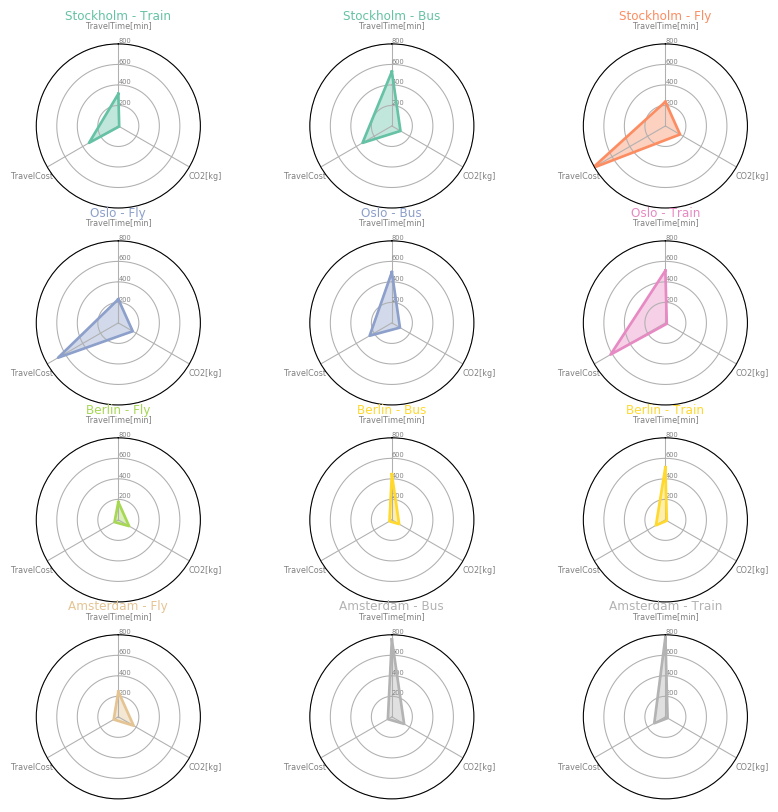

In [273]:
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(destination.index))
 
# Loop to plot
for row in range(0, len(destination.index)):
  make_spider( row=row, title= destination['City'][row] + ' - '+ destination['TransportType'][row], color=my_palette(row))
